In [47]:
pip install wbdata

In [48]:
import wbdata
import datetime
import pandas as pd

In [49]:
wbdata.get_country()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

In [50]:
#wbdata.get_country(300) # list of countries
LAMcountries=['ARG','BLZ','BOL','BRA','CHL','COL','CRI','CUB','SLV','GTM','GUY','HTI','HND',
          'JAM','MEX','NIC','PAN','PRY','PER','PRI','SUR','URY','VEN']
NAMcountries=['USA','CAN']
#regions=['LCN','WLD','NAC']
#WORLD = WLD; LAT AM AND CARRIBEAN = LCN;
#NAC=North America
regions=['NAC','WLD','LCN']
allcountries=LAMcountries+NAMcountries
allregions=allcountries+regions

In [51]:
allregions=country=('BE','BG','CZ','DK','DE','EE','IE','GR','ES','FR','HR','IT','CY','LV','LT','LU',
                                    'HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE','GBR')

In [52]:
wbdata.get_topic()

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

In [53]:
wbdata.get_indicator(topic=19)

id                    name
--------------------  ------------------------------------------------------------------------------------------
AG.LND.AGRI.K2        Agricultural land (sq. km)
AG.LND.AGRI.ZS        Agricultural land (% of land area)
AG.LND.ARBL.ZS        Arable land (% of land area)
AG.LND.EL5M.RU.K2     Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS     Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.UR.K2     Urban land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.UR.ZS     Urban land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.ZS        Land area where elevation is below 5 meters (% of total land area)
AG.LND.FRST.K2        Forest area (sq. km)
AG.LND.FRST.ZS        Forest area (% of land area)
AG.LND.IRIG.AG.ZS     Agricultural irrigated land (% of total agricultural land)
AG.LND.PRCP.MM        Average precipitation in depth (mm per year)
AG.YLD.CREL.KG      

In [54]:
indicators={ "SP.POP.GROW":        "Population ",
"EN.CLC.MDAT.ZS":    "extreme temperatures ",
    "EN.ATM.GHGT.ZG":  "greenhouse gas emissions ",
    "EG.ELC.COAL.ZS":    "Electricity production(coal)",
       "EG.ELC.HYRO.ZS":"Electricity production(hydroelectric)",
            "EG.ELC.NGAS.ZS":"Electricity production(natural gas)",
            "SP.POP.TOTL": "Population, total"
    }

In [55]:
dtframe=wbdata.get_dataframe(indicators,country=allregions)

In [56]:
dtframe2= dtframe.copy() #creates a copy of dataframe; if you instead  do dtframe2=dtframe all changes to dtframe2 will impact dtframe
dtframe2.reset_index(inplace=True)

In [57]:
dtframe2['text']=dtframe2['country']+dtframe2['date'].map(str)

In [58]:
dtframe2.tail

<bound method NDFrame.tail of       country  date  Population   extreme temperatures   \
0     Austria  2022     0.963775                    NaN   
1     Austria  2021     0.435672                    NaN   
2     Austria  2020     0.415177                    NaN   
3     Austria  2019     0.444674                    NaN   
4     Austria  2018     0.487072                    NaN   
...       ...   ...          ...                    ...   
1759   Sweden  1964     0.747117                    NaN   
1760   Sweden  1963     0.563634                    NaN   
1761   Sweden  1962     0.551535                    NaN   
1762   Sweden  1961     0.471081                    NaN   
1763   Sweden  1960          NaN                    NaN   

      greenhouse gas emissions   Electricity production(coal)  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3

In [59]:
dtframe2.info()

<class 'wbdata.api.WBDataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                1764 non-null   object 
 1   date                                   1764 non-null   object 
 2   Population                             1736 non-null   float64
 3   extreme temperatures                   27 non-null     float64
 4   greenhouse gas emissions               609 non-null    float64
 5   Electricity production(coal)           1347 non-null   float64
 6   Electricity production(hydroelectric)  1347 non-null   float64
 7   Electricity production(natural gas)    1347 non-null   float64
 8   Population, total                      1764 non-null   float64
 9   text                                   1764 non-null   object 
dtypes: float64(7), object(3)
memory usage: 137.9+ KB


In [60]:
dfnas=dtframe2.isnull()
dfnas

,country,date,Population,extreme temperatures,greenhouse gas emissions,Electricity production(coal),Electricity production(hydroelectric),Electricity production(natural gas),"Population, total",text
0,False,False,False,True,True,True,True,True,False,False
1,False,False,False,True,True,True,True,True,False,False
2,False,False,False,True,True,True,True,True,False,False
3,False,False,False,True,True,True,True,True,False,False
4,False,False,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1759,False,False,False,True,True,False,False,False,False,False
1760,False,False,False,True,True,False,False,False,False,False
1761,False,False,False,True,True,False,False,False,False,False
1762,False,False,False,True,True,False,False,False,False,False


In [61]:
dtframe2=dtframe2.dropna()

In [62]:
dtframe2.tail

<bound method NDFrame.tail of               country  date  Population   extreme temperatures   \
13            Austria  2009     0.261953               0.038153   
76            Belgium  2009     0.804600               0.001692   
139          Bulgaria  2009    -0.644281               0.008553   
265           Czechia  2009     0.569729               0.155746   
328           Germany  2009    -0.253383               0.032825   
391           Denmark  2009     0.535079               0.000000   
454             Spain  2009     0.885736               0.729194   
517           Estonia  2009    -0.192768               0.000000   
580           Finland  2009     0.478246               0.000387   
643            France  2009     0.513103               0.005718   
706    United Kingdom  2009     0.756391               0.032407   
769            Greece  2009     0.263026               0.006583   
832           Croatia  2009    -0.105028               0.002494   
895           Hungary  2009    -

In [63]:
dtframe2.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Czechia', 'Germany', 'Denmark',
       'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
       'Greece', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Slovak Republic', 'Slovenia', 'Sweden'], dtype=object)

In [64]:
dtframe2.query("country == 'Austria'")
dtframe2.query("country == 'Sweden'")
dtframe2.query("country == 'Belgium'")
dtframe2.query("country == 'Bulgaria'")
dtframe2.query("country == 'Ireland'")
dtframe2.query("country == 'Poland'")

,country,date,Population,extreme temperatures,greenhouse gas emissions,Electricity production(coal),Electricity production(hydroelectric),Electricity production(natural gas),"Population, total",text
1399,Poland,2009,0.067763,0.032017,-14.471008,89.248351,1.571588,3.16766,38151603.0,Poland2009


In [65]:
dtframe2 = dtframe2.rename(columns={'date': 'Year', 'country': 'Country'})

In [66]:
dtframe2

,Country,Year,Population,extreme temperatures,greenhouse gas emissions,Electricity production(coal),Electricity production(hydroelectric),Electricity production(natural gas),"Population, total",text
13,Austria,2009,0.261953,0.038153,11.535759,7.592436,61.668376,18.612401,8343323.0,Austria2009
76,Belgium,2009,0.804600,0.001692,-4.904699,6.855889,0.365232,32.637018,10796493.0,Belgium2009
139,Bulgaria,2009,-0.644281,0.008553,-39.739798,49.793540,8.187631,4.627073,7444443.0,Bulgaria2009
265,Czechia,2009,0.569729,0.155746,-29.728582,59.571002,2.975549,1.194385,10443936.0,Czechia2009
328,Germany,2009,-0.253383,0.032825,-24.330622,44.113559,3.225779,13.919107,81902307.0,Germany2009
391,Denmark,2009,0.535079,0.000000,-13.067732,48.613363,0.052222,18.335486,5523095.0,Denmark2009
454,Spain,2009,0.885736,0.729194,27.094370,12.655678,9.048923,36.915877,46362946.0,Spain2009
517,Estonia,2009,-0.192768,0.000000,-66.272605,4.533546,0.364506,1.230208,1334515.0,Estonia2009
580,Finland,2009,0.478246,0.000387,-0.742737,16.088748,17.602575,13.588367,5338871.0,Finland2009
643,France,2009,0.513103,0.005718,-4.896381,4.526225,10.740715,3.863657,64710879.0,France2009


In [67]:
# Function of change year
def change_year_type(dtframe2):

    #print("Changing type of Year for: " + dtframe.loc[0]['Country'])
    # validation to check if year column exists in the dataframe
    if 'Year' in dtframe2.columns:
        # convert year to a string
        dtframe['Year'] = dtframe2.Year.astype(str)

    print("Completed changing type")
    # return the dtframe
    return dtframe2

In [68]:
dtframe2['Year'] = dtframe2.Year.astype(str)

In [69]:
dtframe2

,Country,Year,Population,extreme temperatures,greenhouse gas emissions,Electricity production(coal),Electricity production(hydroelectric),Electricity production(natural gas),"Population, total",text
13,Austria,2009,0.261953,0.038153,11.535759,7.592436,61.668376,18.612401,8343323.0,Austria2009
76,Belgium,2009,0.804600,0.001692,-4.904699,6.855889,0.365232,32.637018,10796493.0,Belgium2009
139,Bulgaria,2009,-0.644281,0.008553,-39.739798,49.793540,8.187631,4.627073,7444443.0,Bulgaria2009
265,Czechia,2009,0.569729,0.155746,-29.728582,59.571002,2.975549,1.194385,10443936.0,Czechia2009
328,Germany,2009,-0.253383,0.032825,-24.330622,44.113559,3.225779,13.919107,81902307.0,Germany2009
391,Denmark,2009,0.535079,0.000000,-13.067732,48.613363,0.052222,18.335486,5523095.0,Denmark2009
454,Spain,2009,0.885736,0.729194,27.094370,12.655678,9.048923,36.915877,46362946.0,Spain2009
517,Estonia,2009,-0.192768,0.000000,-66.272605,4.533546,0.364506,1.230208,1334515.0,Estonia2009
580,Finland,2009,0.478246,0.000387,-0.742737,16.088748,17.602575,13.588367,5338871.0,Finland2009
643,France,2009,0.513103,0.005718,-4.896381,4.526225,10.740715,3.863657,64710879.0,France2009


In [70]:
df_copy=dtframe2.drop(['Year', 'Country'], axis='columns')
df_copy.describe()

,Population,extreme temperatures,greenhouse gas emissions,Electricity production(coal),Electricity production(hydroelectric),Electricity production(natural gas),"Population, total"
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01
mean,0.231250,0.049320,-15.790097,23.955461,15.699523,23.929047,1.929567e+07
std,0.736628,0.143472,25.423814,22.509846,19.751923,22.388844,2.349416e+07
min,-1.651025,0.000000,-66.272605,0.000000,0.052222,1.133203,4.977830e+05
25%,-0.142438,0.000097,-31.834535,7.040026,1.902587,5.370456,4.736249e+06
50%,0.359320,0.005313,-11.564336,16.293149,8.491956,17.289856,9.660582e+06
75%,0.709726,0.032720,-1.781148,36.102771,17.462427,35.188344,1.940821e+07
max,1.851775,0.729194,29.651659,89.248351,62.075777,90.196701,8.190231e+07


In [71]:
import pandas as pd
import numpy as np
import requests

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-72-6a28eca6b6f3>:8: FutureWarning: The default value of numeric_only in WBDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned_us_copy.corr(), cmap='afmhot', center=0,ax=ax)


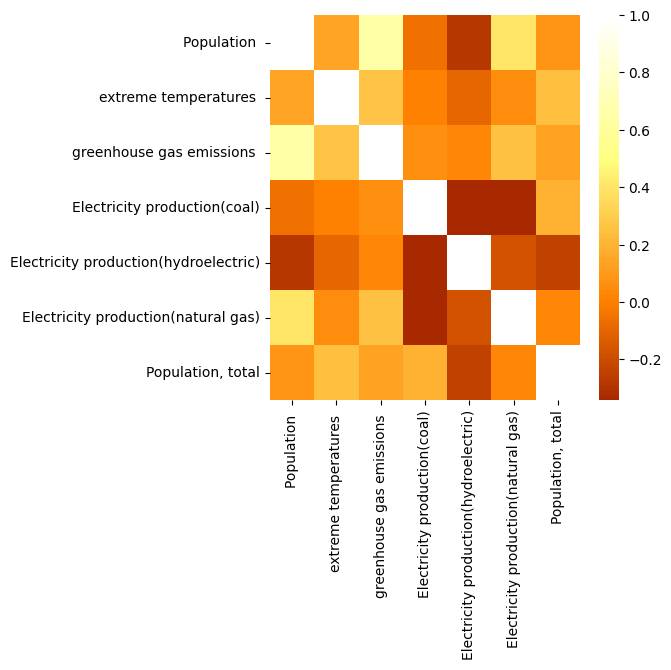

In [72]:
# produced a copy
df_cleaned_us_copy=dtframe2.copy()
#categorical features from the matrix
df_cleaned_us_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df_cleaned_us_copy.corr(), cmap='afmhot', center=0,ax=ax)
plt.savefig('correlation_us.png')
plt.show()

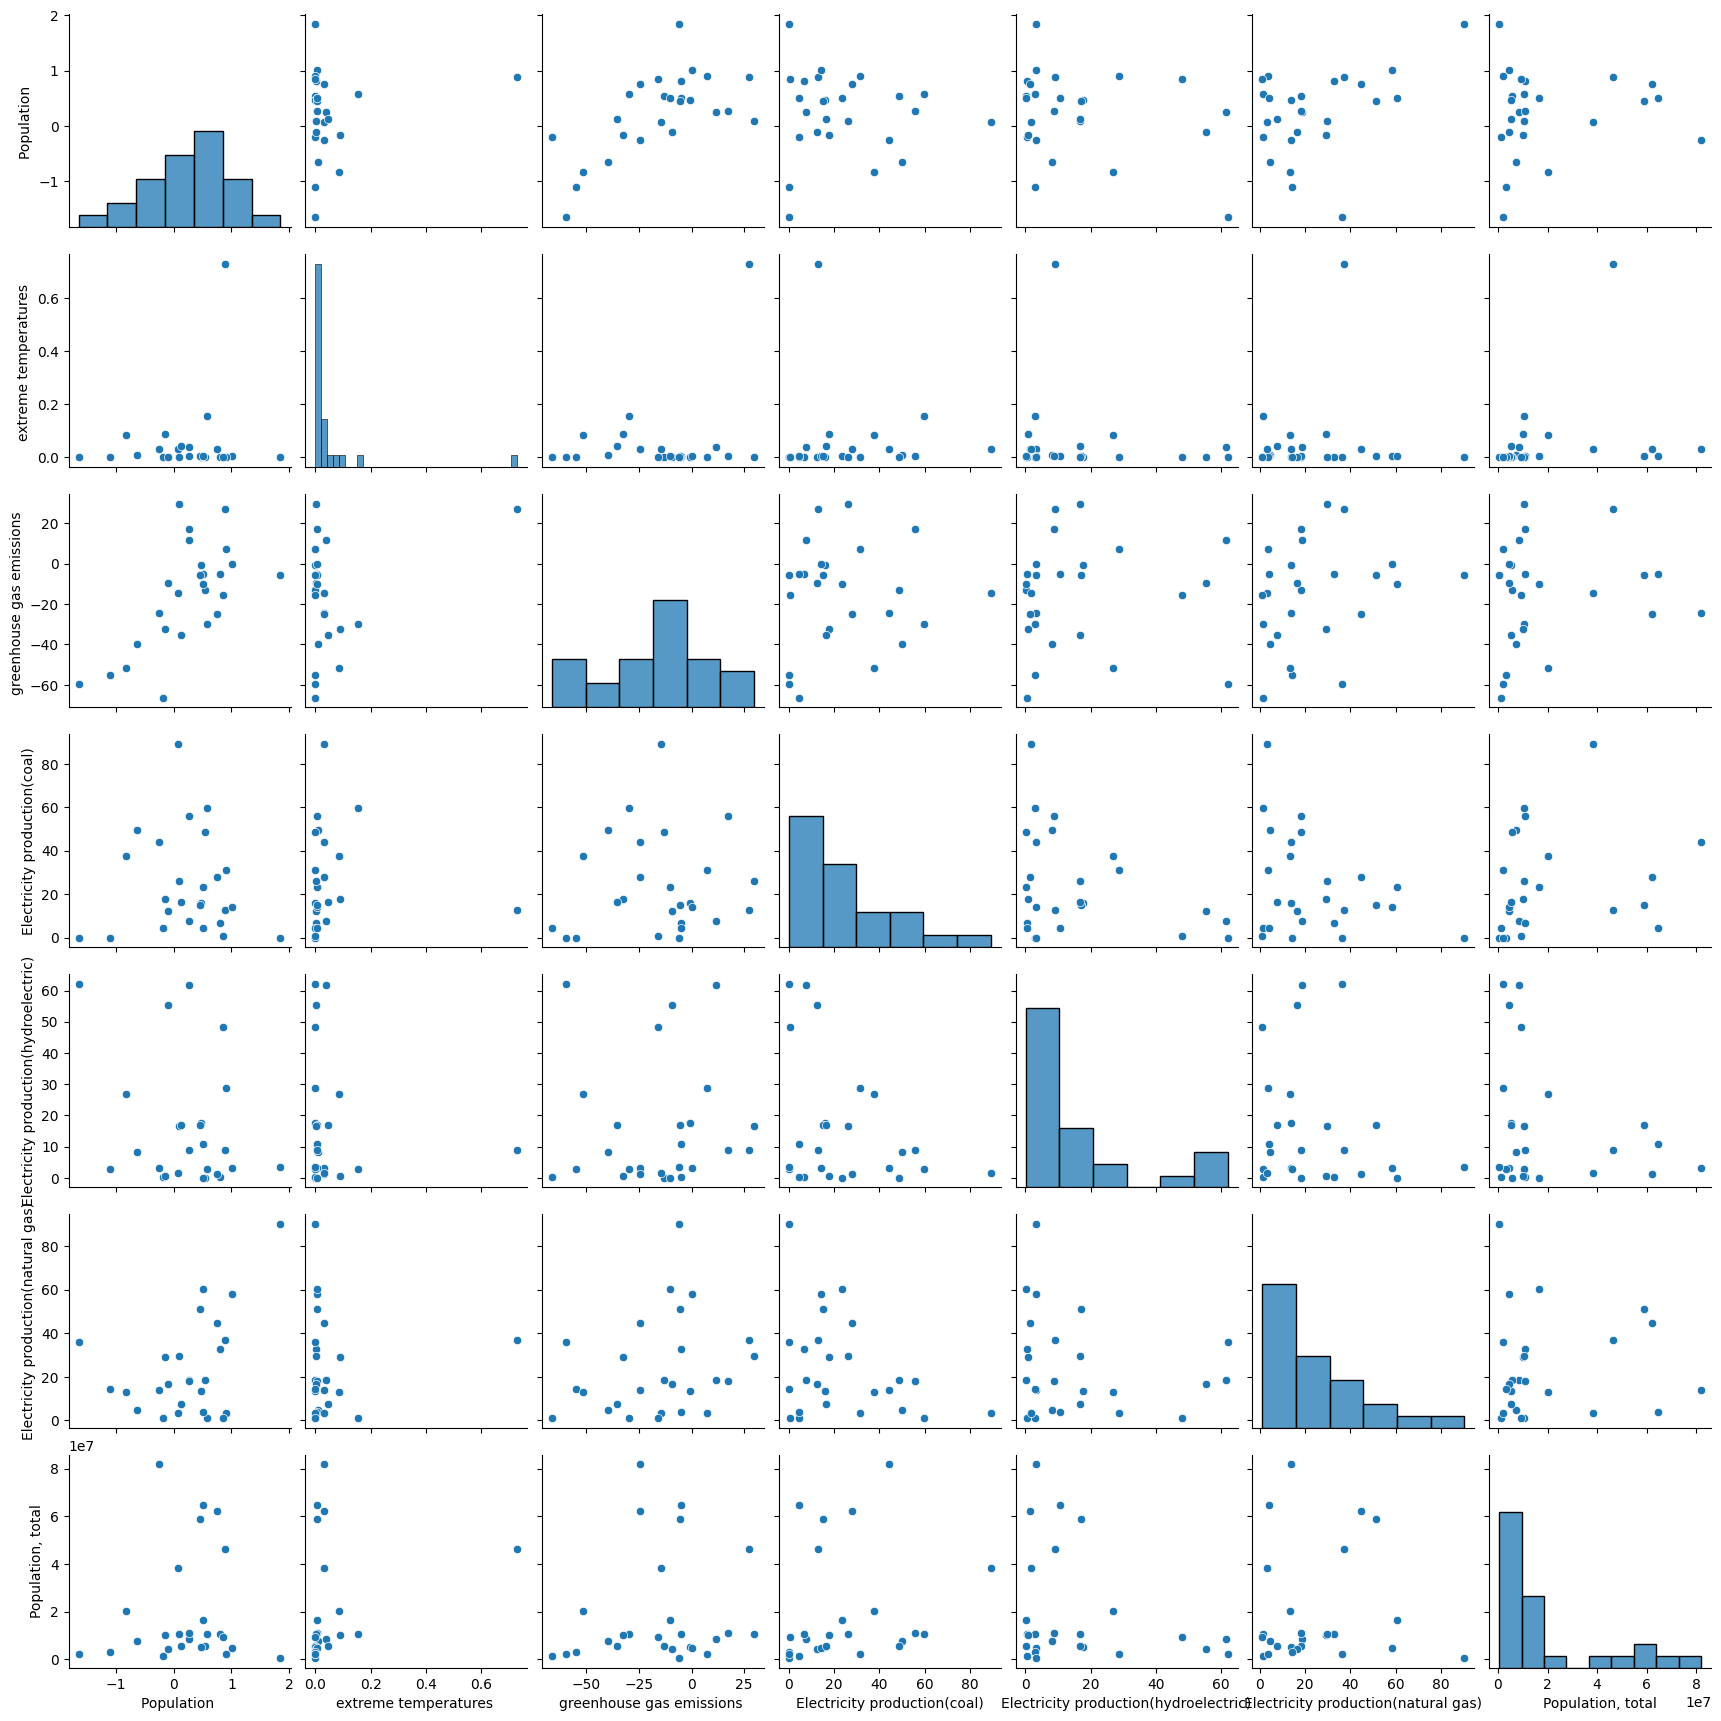

In [75]:
sns.pairplot(dtframe2)

In [77]:
sns.scatterplot(x='Electricity production from coal sources (% of total)', y='Population, total', data=dtframe2, hue='Population, total')

ValueError: ignored

In [16]:
sns.scatterplot(x='Electricity production from hydroelectric sources (% of total)', y='Population, total', data=dtframe2, hue='Population, total')

NameError: ignored

<Axes: xlabel='Electricity production from natural gas sources (% of total)', ylabel='Population, total'>

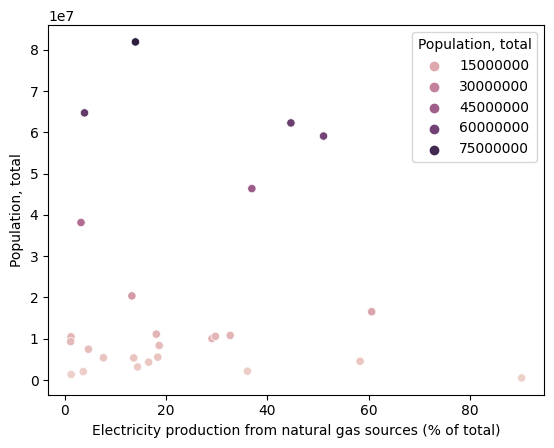

In [37]:
sns.scatterplot(x='Electricity production from natural gas sources (% of total)', y='Population, total', data=dtframe2, hue='Population, total')

<ipython-input-38-29ed0871dbce>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dtframe2['Population, total'], shade=True, color='BLUE')


<Axes: xlabel='Population, total', ylabel='Density'>

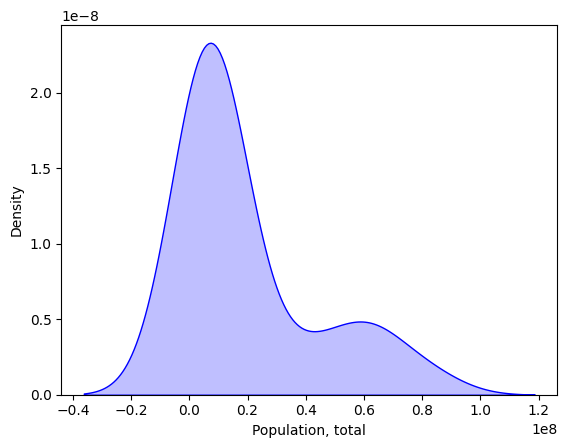

In [38]:
sns.kdeplot(dtframe2['Population, total'], shade=True, color='BLUE')

Population growth (annual %)                                                      Axes(0.125,0.653529;0.227941x0.226471)
Droughts, floods, extreme temperatures (% of population, average 1990-2009)    Axes(0.398529,0.653529;0.227941x0.226471)
Total greenhouse gas emissions (% change from 1990)                            Axes(0.672059,0.653529;0.227941x0.226471)
Electricity production from coal sources (% of total)                             Axes(0.125,0.381765;0.227941x0.226471)
Electricity production from hydroelectric sources (% of total)                 Axes(0.398529,0.381765;0.227941x0.226471)
Electricity production from natural gas sources (% of total)                   Axes(0.672059,0.381765;0.227941x0.226471)
Population, total                                                                     Axes(0.125,0.11;0.227941x0.226471)
dtype: object

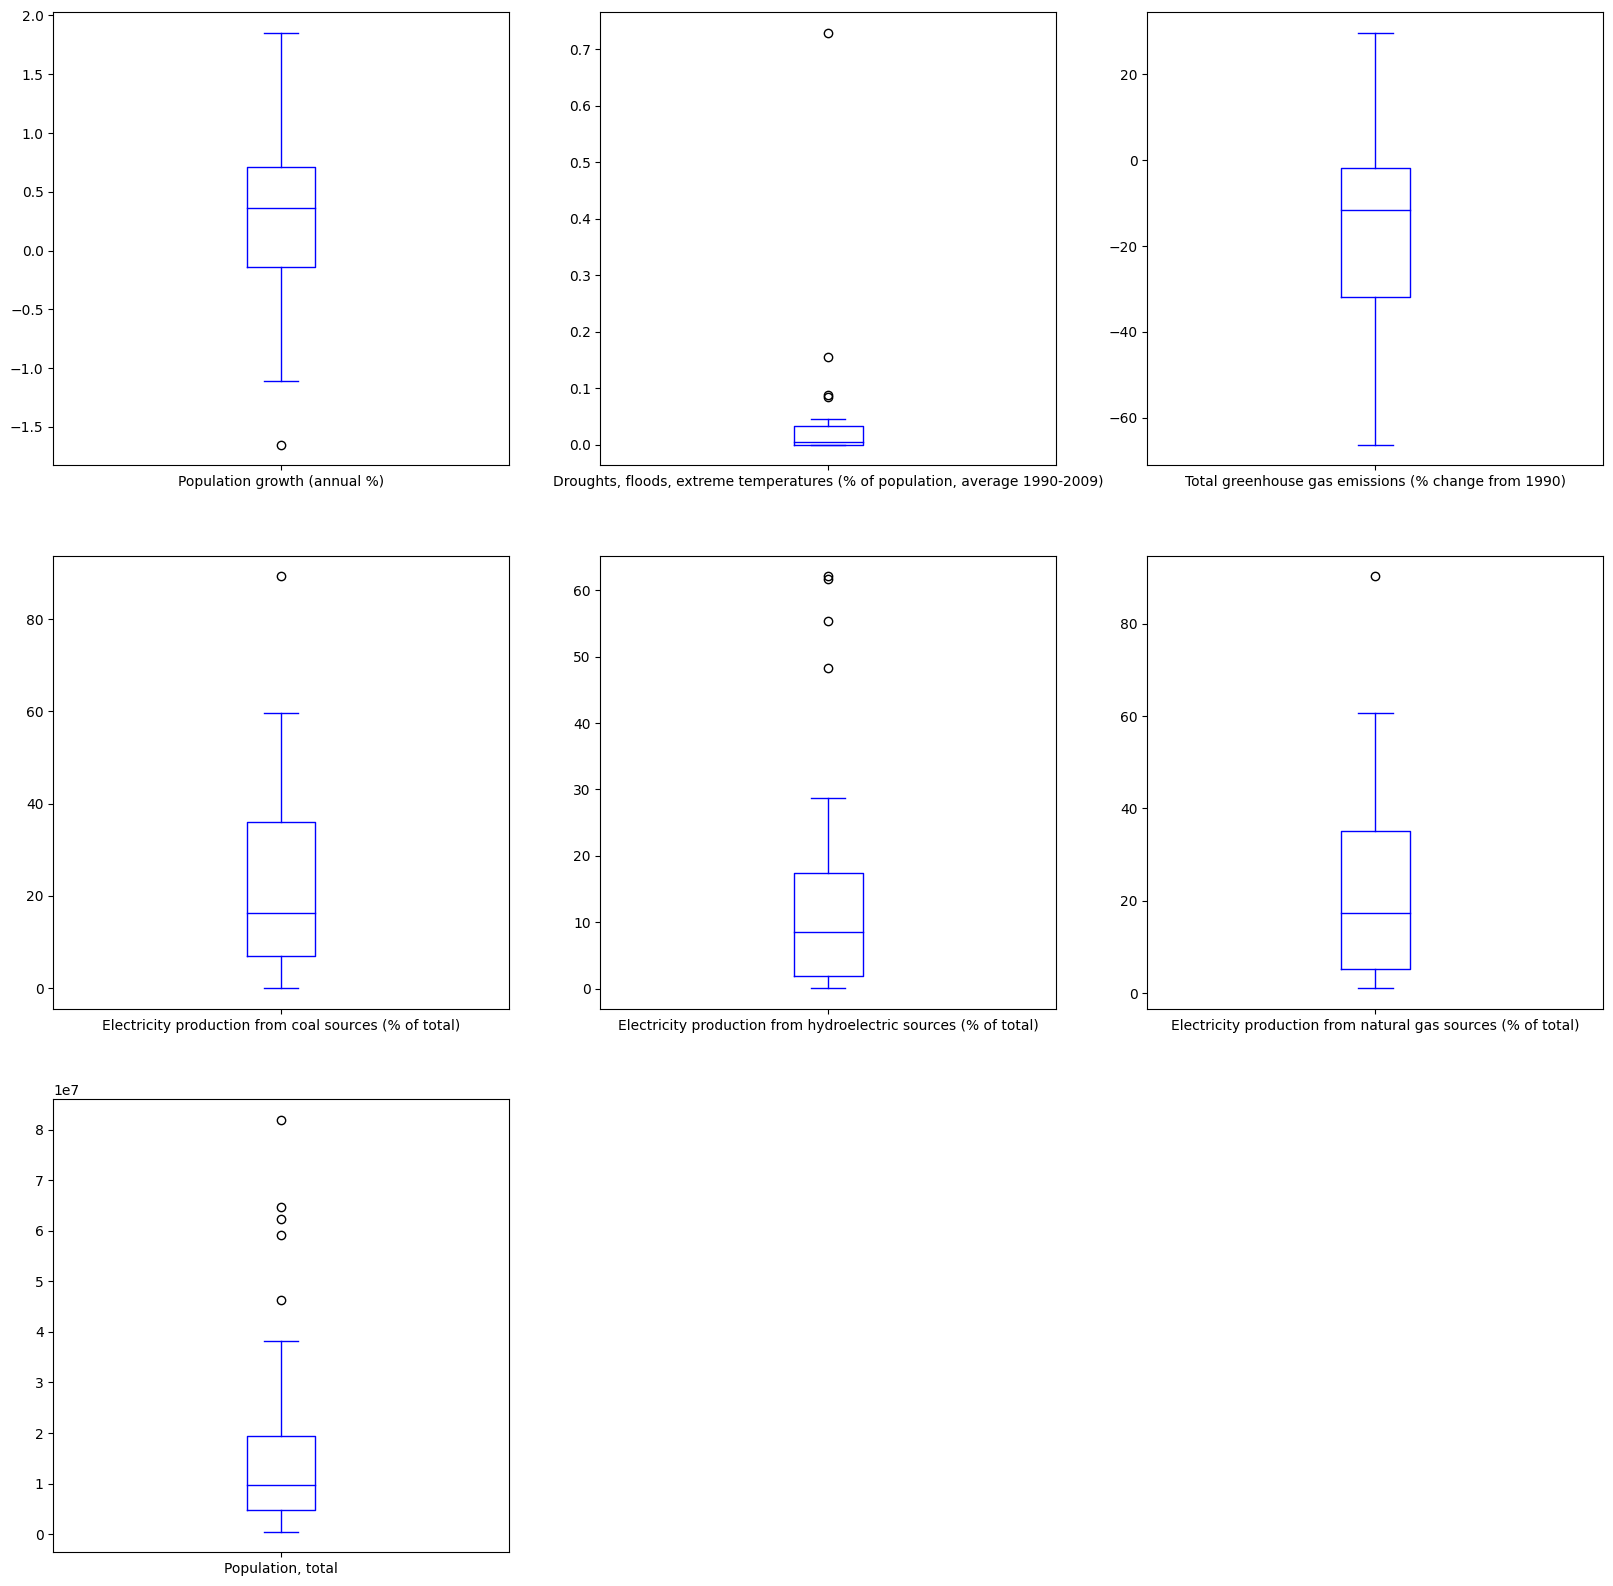

In [39]:
dtframe2.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20, 20), color='blue')

In [40]:
dtframe2.squeeze()

,Country,Year,Population growth (annual %),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Total greenhouse gas emissions (% change from 1990),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total",text
13,Austria,2009,0.261953,0.038153,11.535759,7.592436,61.668376,18.612401,8343323.0,Austria2009
76,Belgium,2009,0.804600,0.001692,-4.904699,6.855889,0.365232,32.637018,10796493.0,Belgium2009
139,Bulgaria,2009,-0.644281,0.008553,-39.739798,49.793540,8.187631,4.627073,7444443.0,Bulgaria2009
265,Czechia,2009,0.569729,0.155746,-29.728582,59.571002,2.975549,1.194385,10443936.0,Czechia2009
328,Germany,2009,-0.253383,0.032825,-24.330622,44.113559,3.225779,13.919107,81902307.0,Germany2009
391,Denmark,2009,0.535079,0.000000,-13.067732,48.613363,0.052222,18.335486,5523095.0,Denmark2009
454,Spain,2009,0.885736,0.729194,27.094370,12.655678,9.048923,36.915877,46362946.0,Spain2009
517,Estonia,2009,-0.192768,0.000000,-66.272605,4.533546,0.364506,1.230208,1334515.0,Estonia2009
580,Finland,2009,0.478246,0.000387,-0.742737,16.088748,17.602575,13.588367,5338871.0,Finland2009
643,France,2009,0.513103,0.005718,-4.896381,4.526225,10.740715,3.863657,64710879.0,France2009


In [41]:
series=dtframe2.squeeze()

In [42]:
ser = dtframe2.iloc[:,0]

In [43]:
print(type(ser))

<class 'pandas.core.series.Series'>


In [44]:
dtframe2

,Country,Year,Population growth (annual %),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Total greenhouse gas emissions (% change from 1990),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total",text
13,Austria,2009,0.261953,0.038153,11.535759,7.592436,61.668376,18.612401,8343323.0,Austria2009
76,Belgium,2009,0.804600,0.001692,-4.904699,6.855889,0.365232,32.637018,10796493.0,Belgium2009
139,Bulgaria,2009,-0.644281,0.008553,-39.739798,49.793540,8.187631,4.627073,7444443.0,Bulgaria2009
265,Czechia,2009,0.569729,0.155746,-29.728582,59.571002,2.975549,1.194385,10443936.0,Czechia2009
328,Germany,2009,-0.253383,0.032825,-24.330622,44.113559,3.225779,13.919107,81902307.0,Germany2009
391,Denmark,2009,0.535079,0.000000,-13.067732,48.613363,0.052222,18.335486,5523095.0,Denmark2009
454,Spain,2009,0.885736,0.729194,27.094370,12.655678,9.048923,36.915877,46362946.0,Spain2009
517,Estonia,2009,-0.192768,0.000000,-66.272605,4.533546,0.364506,1.230208,1334515.0,Estonia2009
580,Finland,2009,0.478246,0.000387,-0.742737,16.088748,17.602575,13.588367,5338871.0,Finland2009
643,France,2009,0.513103,0.005718,-4.896381,4.526225,10.740715,3.863657,64710879.0,France2009


KeyError: ignored

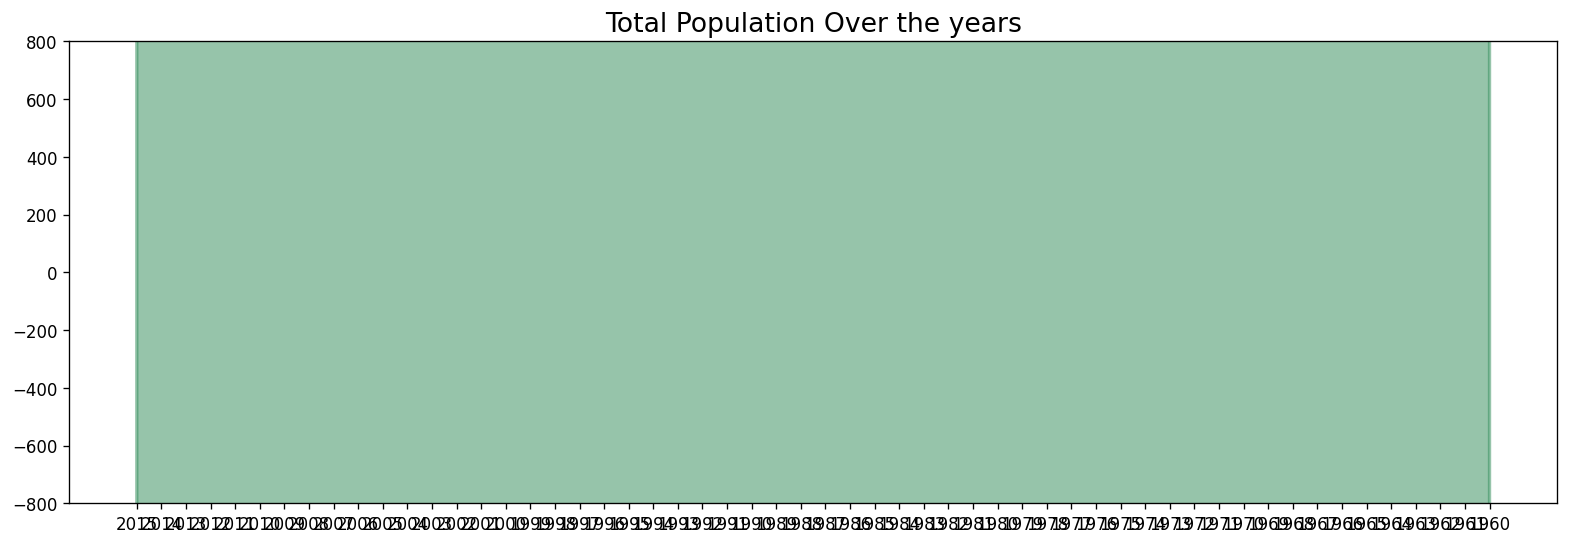

In [39]:
x = dtframe2['Year'].values
y1 = dtframe2['Population, total'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Total Population Over the years', fontsize=16)
plt.hlines(y=0, xmin=np.min(dtframe['Year']), xmax=np.max(dtframe['Year']), linewidth=.2)
plt.show()

In [ ]:
def plot_df(df2, x, y, title="", xlabel='Year', ylabel='Population, total', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df2, x=df2.index, y=df2.value, title='Population  in Australia from 1992 to 2008.')

AttributeError: ignored

In [ ]:
print(df2[0:6])

    Country  Year  Electricity production from coal sources (% of total)  \
7   Austria  2015                                           8.226608       
8   Austria  2014                                           7.970332       
9   Austria  2013                                           9.456235       
10  Austria  2012                                           9.087469       
11  Austria  2011                                          11.778970       
12  Austria  2010                                           9.868402       

    Electricity production from hydroelectric sources (% of total)  \
7                                           59.997086                
8                                           66.557388                
9                                           65.132455                
10                                          63.753457                
11                                          54.989401                
12                                          56.

In [ ]:
# refer to the list of countries
list_countries = ['Austria','Belgium','Geremany','Poland']
# intialise two dataframes df_00- year 2000, df_18 - year 2018
df_00 = pd.DataFrame()
df_18 = pd.DataFrame()

# for each dataframe in the list of cleaned dataframes
for i,df in enumerate(df2):
    # pick the value of Total Population for year 2000 and 2018
    df_00[list_countries[i]] = df[df['Year'] == 2000]["Population, total"]
    df_18[list_countries[i]] = df[df['Year'] == 2018]["Population, total"]

# The resulting dataframes have the countries as columns and the two rows each for 2000 and 2018
# To be able to draw a grouped bar plot we need the years as columns, hence we take a transpose
df_00 = df_00.T
df_18 = df_18.T

pd.options.display.float_format = '{:,.1f}'.format  # set other global format

# rename the columns to the year
df_00 = df_00.rename(columns={18 : 2000})
df_18 = df_18.rename(columns={0 : 2018})

# join the dataframes for both the years
df_both_years= df_00.join(df_18)

# the index is the Country name, hence we add it as a column into the data frame.
df_both_years['Countries'] = df_both_years.index

# drop the original index
df_both_years.reset_index(drop=True)

print("Data of Total Population for 2000 and 2018 for all countries: ")
display(df_both_years)

TypeError: ignored

In [ ]:
list_countries

In [ ]:
plt.figure(figsize=(7, 5))
# plot the chart using matplotlib.pyplot library
df_both_years.plot(kind='bar',x='Countries',y=[2000, 2018])

In [ ]:
# function to to form a dataframe with Year, GDP and Country
def extract_columns(df_cleaned_us_copy):
    df=pd.DataFrame()
    # pick data for the recent 10 years, note that the data sorted in descending order of year
    df['Year']=df_cleaned.loc[:10, 'Year']
    df['GDP in USD']=df_cleaned.loc[:10, 'GDP in USD']
    df['Country']=df_cleaned.loc[:10, 'Country']
    return df

# function to fetch a single dataframe with 3 features from each country
def form_gdp_df():
    # function call to extract_columns()
    indf=extract_columns(df_cleaned_in)
    usdf=extract_columns(df_cleaned_us)
    cndf=extract_columns(df_cleaned_cn)
    jpdf=extract_columns(df_cleaned_jp)
    cadf=extract_columns(df_cleaned_ca)
    gbdf=extract_columns(df_cleaned_gb)
    zadf=extract_columns(df_cleaned_za)
    # combine the 7 dfs into a single df with 3 columns
    # we ignore the original index
    gdp_df=pd.concat([indf, usdf, cndf, jpdf, cadf, gbdf, zadf], ignore_index=True)
    return gdp_df

# get the combined DF
gdp_df=form_gdp_df()

print("Few records from the Dataframe containing Year, GDP and Country:")
display(gdp_df.head())

# set figure size
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
# plot using seaborn library
ax=sns.lineplot(x='Year', y='GDP in USD', hue='Country', style="Country",palette="Set2", markers=True, dashes=False, data=gdp_df, linewidth=2.5)


In [ ]:
list_df=list(map(change_year_type, df2))

In [ ]:
# create a copy
df_cleaned_us_copy=df_cleaned_us.copy()
# Exclude the categorical features from the matrix
df_cleaned_us_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_cleaned_us_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.savefig('correlation_us.png')
plt.show()